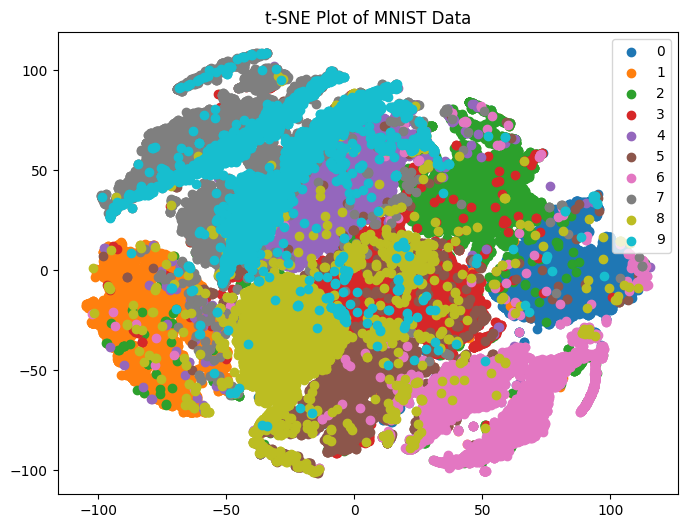

Accuracy for binary classification: 0.9526
Accuracy for multi-class classification: 0.2195
Reconstruction error for k = 1: 0.862899285313098
Reconstruction error for k = 2: 0.8256018233777302
Reconstruction error for k = 3: 0.7914036631445597
Reconstruction error for k = 4: 0.7650181102835478
Reconstruction error for k = 5: 0.7419615428780196


In [5]:
import numpy as np
import idx2numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Load MNIST images and labels using idx2numpy
X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

# Flatten the images to (n_samples, n_features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the features to N(0,1)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Save X_train_normalized to an npy file
np.save('X_train_normalized.npy', X_train_normalized)

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform on the training data
X_tsne = tsne.fit_transform(X_train_normalized)

# Create a scatter plot with different colors for each class
plt.figure(figsize=(8, 6))
for i in range(10):  # Assuming there are 10 classes in MNIST
    plt.scatter(X_tsne[y_train == i, 0], X_tsne[y_train == i, 1], label=str(i))
plt.legend()
plt.title('t-SNE Plot of MNIST Data')
plt.show()

# Binary Classification
class1, class2 = 0, 1
y_train_binary = (y_train == class1) | (y_train == class2)
y_test_binary = (y_test == class1) | (y_test == class2)
model_binary = LinearRegression()
model_binary.fit(X_train_normalized, y_train_binary)
y_pred_binary = model_binary.predict(X_test_normalized)
y_pred_binary = (y_pred_binary >= 0.5)
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy for binary classification: {accuracy_binary}')

# Multi-class Classification
model_multi = LinearRegression()
model_multi.fit(X_train_normalized, y_train)
y_pred_multi = model_multi.predict(X_test_normalized)
y_pred_multi = np.round(y_pred_multi).astype(int)
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f'Accuracy for multi-class classification: {accuracy_multi}')